*Created by Petteri Nevavuori.*

---

# Deep Learning seminaari

Kirjana Goodfellow et al.: Deep Learning (2016)

Otsikot seuraavat pääotsikoiden tasolla kirjaa, mutta alaotsikot eivät aina.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#7.-Regularization-for-Deep-Learning" data-toc-modified-id="7.-Regularization-for-Deep-Learning-1">7. Regularization for Deep Learning</a></span><ul class="toc-item"><li><span><a href="#7.1.-Parameter-Norm-Penalties" data-toc-modified-id="7.1.-Parameter-Norm-Penalties-1.1">7.1. Parameter Norm Penalties</a></span><ul class="toc-item"><li><span><a href="#$L^2$-Parameter-Regularization" data-toc-modified-id="$L^2$-Parameter-Regularization-1.1.1">$L^2$ Parameter Regularization</a></span></li><li><span><a href="#$L^1$-Regularization" data-toc-modified-id="$L^1$-Regularization-1.1.2">$L^1$ Regularization</a></span></li></ul></li><li><span><a href="#7.2.-Norm-Penalties-as-Constrained-Optimization" data-toc-modified-id="7.2.-Norm-Penalties-as-Constrained-Optimization-1.2">7.2. Norm Penalties as Constrained Optimization</a></span></li><li><span><a href="#7.3.-Regularization-and-Under-Constrained-Problems" data-toc-modified-id="7.3.-Regularization-and-Under-Constrained-Problems-1.3">7.3. Regularization and Under-Constrained Problems</a></span></li><li><span><a href="#7.4.-Dataset-Augmentation" data-toc-modified-id="7.4.-Dataset-Augmentation-1.4">7.4. Dataset Augmentation</a></span></li><li><span><a href="#7.5.-Noise-Robustness" data-toc-modified-id="7.5.-Noise-Robustness-1.5">7.5. Noise Robustness</a></span></li><li><span><a href="#7.6.-Semi-Supervised-Learning" data-toc-modified-id="7.6.-Semi-Supervised-Learning-1.6">7.6. Semi-Supervised Learning</a></span></li><li><span><a href="#7.7.-Multitask-Learning" data-toc-modified-id="7.7.-Multitask-Learning-1.7">7.7. Multitask Learning</a></span></li><li><span><a href="#7.8.-Early-Stopping" data-toc-modified-id="7.8.-Early-Stopping-1.8">7.8. Early Stopping</a></span></li><li><span><a href="#7.9.-Parameter-Tying-and-Parameter-Sharing" data-toc-modified-id="7.9.-Parameter-Tying-and-Parameter-Sharing-1.9">7.9. Parameter Tying and Parameter Sharing</a></span><ul class="toc-item"><li><span><a href="#Convolutional-Neural-Networks" data-toc-modified-id="Convolutional-Neural-Networks-1.9.1">Convolutional Neural Networks</a></span></li></ul></li><li><span><a href="#7.10.-Sparse-Representations" data-toc-modified-id="7.10.-Sparse-Representations-1.10">7.10. Sparse Representations</a></span></li><li><span><a href="#7.11.-Bagging-and-Other-Ensemble-Methods" data-toc-modified-id="7.11.-Bagging-and-Other-Ensemble-Methods-1.11">7.11. Bagging and Other Ensemble Methods</a></span></li><li><span><a href="#7.12.-Dropout" data-toc-modified-id="7.12.-Dropout-1.12">7.12. Dropout</a></span></li><li><span><a href="#7.13.-Adversarial-Training" data-toc-modified-id="7.13.-Adversarial-Training-1.13">7.13. Adversarial Training</a></span></li><li><span><a href="#7.14.-Tangent-Distance,-Tangent-Prop-and-Manifold-Tangent-Classifier" data-toc-modified-id="7.14.-Tangent-Distance,-Tangent-Prop-and-Manifold-Tangent-Classifier-1.14">7.14. Tangent Distance, Tangent Prop and Manifold Tangent Classifier</a></span></li></ul></li></ul></div>

## 7. Regularization for Deep Learning

Regularisointimenetelmiksi kutsutaan kaikkia niitä menetelmiä, joilla pyritään parantamaan mallin yleistyvyyttä eli testitarkkuutta. Menetelmien kehitys on edelleen jatkuvan tutkimuksen ja kehityksen kohde. Luku laajentaa viidennen luvun regularisointiosiota käsitellen niitä koulutettaviin malliin liitettävinä komponentteina. Regularisointi määritellään *miksi tahansa muutokseksi, joka tehdään vain testivirheen pienentämiseksi*. Koulutusvirhettä ei toisin sanoen pyritä pienentämään.

Ylätasolla regularisointia voidaan toteuttaa muun muassa:

- Ylimääräisillä rajoitteilla (*constraint*), esim. mallin parametreille (painoille).
- Muokkaamalla kohdefunktiota pehmeämmiksi rajoitteiksi.

Syväoppimisen alueella useimmat regularisointistrategiat perustuvat mallin parametrien estimaattoreihin, jolloin vääristymää suurentamalla saavutetaan pienempi hajonta (johdonmukaisempaa epätarkempana) (*bias-variance tradeoff*). Tehokas regularisaatiomenetelmä kykenee tekemään tämän vaihtokaupan kannattavasti, jolloin vääristymä kasvaa vain vähän hajonnan pienentyessä merkittävästi.

> *Syväoppimismenetelmien ongelmien datantuottoprosessit voivat pahimmillaan käsittää koko universumin, minkä vuoksi mallin hallinta ei ole vain sen koon hallintaa; riittävän suuri malli reguloituna yleistyy helpommin.*

### 7.1. Parameter Norm Penalties

Monet regularisointimenetelmät keskittyvät parametrien normisakkoon (*parameter norm penalty*) $\Omega$. Normit, joita merkitään yleisesti $L^p$, ovat intuitiivisella tasolla vektorin etäisyysmittoja. Tätä normivirhettä säädetään siihen erityistesti liittyvällä hyperparametrilla, joka lähtökohtaisesti on ei-negatiivinen kerroin. Tällä hyperparametrilla, jota kirjassa merkitään $\alpha$:ksi, vaikutetaan regularisoinnin vahvuuteen. Kun kohdefunktiota merkitään $J$:llä, on regularisoitu virhefuntkio 

$$\tilde{J} = J(\theta;X;y) + \alpha \Omega (\theta).$$

Mallin näkökulmasta jokainen siihen syötetty arvo vääristyy, jolloin sen on opittava löytämään eniten merkittävät parametrit ja painotettava niitä. Regulointi pakottaa näin mallia jatkuvasti pois alueelta, jolla sen koulutusvirhe on minimaalinen eli kauemmas ylisovittumisesta.

Syväoppimismenetelmien kanssa on tyypillistä valita sellainen parametrisakko $\Omega$, joka vaikuttaa vain mallin parametreista sen painoihin. Mallin kerroksiin syötteiden lisäksi syötettävään parametriseen vääristymään ei kosketa. Koska mallin vääristymäparametrit ovat yksittäisiä lukuja, niiden jättäminen regularisoinnin ulkopuolelle ei vaikuta hajontaan merkittävästi.

Tässä vaiheessa tehdään siis erotus parametrien joukon $\theta$ ja mallin painojen joukon $w$ välillä.

#### $L^2$ Parameter Regularization

Normi $L^2$, joka tunnetaan myös nimellä Eukliidinen normi (*Euclidean norm*), on yksinkertaisesti vektorin etäisyys origosta. Tämä normi merkitään tavallisesti $\|x\|$. Koneoppimisen yhteydessä $L^2$-normisakko tunnetaan paremmin myös nimellä painojen heikentyminen (*weight decay*). Tällöin regularisointistrategiana on ajaa painot lähemmäs origoa eli nollaa. $L^2$-regularisointi tunnetaan myös nimillä harjanneregressio (*ridge regression*) ja Tikhonov-regularisointi (*Tikhonov regularization*).

Eukliidisen normin regularisointi lisää jokaiseen koulutuksen virheeseen $0.5\alpha$:lla painotetun painon pituuden. Reguloitu kohdefunktio on tällöin
    
$$ \tilde{J} = J + \alpha \Omega(\theta) = J + 0.5\alpha \| w \|,$$

jossa $J$ on kohdefunktio. kohdefunktiota vääristetään siis suhteessa painojen arvoihin. Painokohtaisia gradientteja reguloidaan taas lisäämällä gradientteihin $\alpha w$ eli hyperparametrilla painotetut painojen arvot.

Tällöin regularisointi vaimentaa mallin painoja jokaisella koulutuskierroksella kertoimella $\alpha$ ennen painojen gradienttiin pohjaavaa päivitystä. Kertoimen $\alpha$ kasvaessa mallin suhteellisesti merkittävämmät painot jäävät jäljelle eli korostuvat, kun taas merkityksettömämmät minimoituvat lähes nollaan. Eli toisin sanoen, vain kohdefunktion pienenemiseen eniten vaikuttavat painot jäävät merkittävinä jäljelle.

#### $L^1$ Regularization

Yleisemmän Eukliidiseen normiin eli vektorin pituuteen perustuvan regularisoinnin lisäksi vektorin alkioihin keskittyvän $L^1$ regularisoinnin käyttö on myös mahdollista. Kyseinen regularisointi ei skaalaudu lineaarisesti, kuten Eukliidiseen normiin pohjaava menetelmä, vaan painoja skaalataan painon arvon etumerkin suuntaan vakiolla $\alpha$. Menetelmä tuottaa myös harvempia tuloksia, jolloin regularisoinnin tuloksena syntyy enemmän nolla-arvoisia painoja. Tällöin regularisointia säätävän skaalaimen eli hyperparametrin $\alpha$ on kuitenkin oltava riittävän suuri.

Painojen arvot määräytyvät seuraavaan kaavan mukaisesti:
 
$$ w_i =  \text{sign}(w^*_i) \max \left(\lvert w^*_i \rvert - \frac{\alpha}{H_{i,i}}, 0\right)$$

Mikäli tietyn painon alkuperäisen arvon $w^*_i$ itseisarvo on pienempi, kuin regularisoinnin skaalaimen ja painon toisen derivaatan suhde $\frac{\alpha}{H_{i,i}}$, se saa arvon nolla. Muussa tapauksessa painon arvoksi muodostuu sen etumerkin mukainen itseisarvoltaan nollaa suurempi luku. Sillä, onko paino lähtökohtaisesti etumerkiltään positiivinen tai negatiivinen, ei ole väliä.

Kaavan $\text{max}$-funktio aukesi itselleni melko vaikeasti. Siksi seuraavaksi esitetään $\frac{\alpha}{H_{i,i}}$ arvoja eri regularisointiskaalaimen $\alpha$ ja painon toisen derivaatan $h_w \in H$ arvoilla.

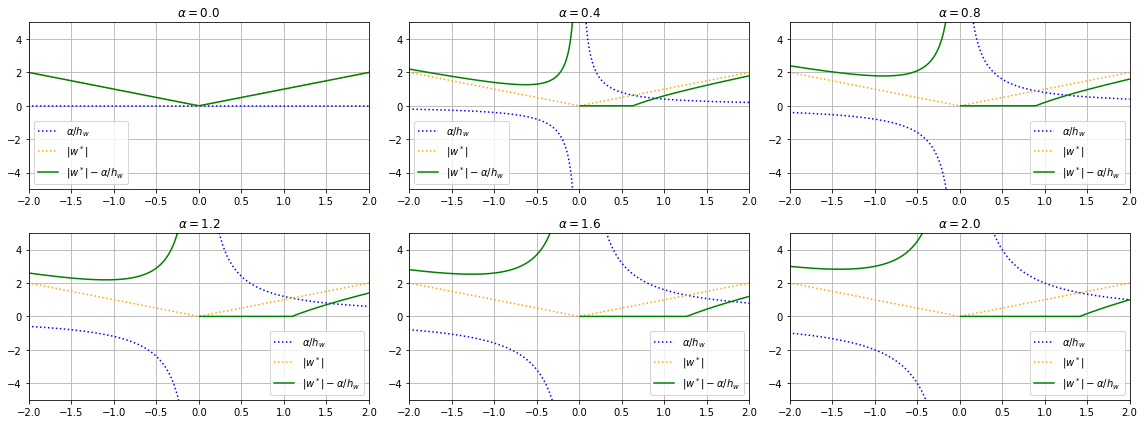

In [122]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 16,6

x = np.arange(-201,201)/100
hessians = np.arange(-201,201)/100

x = x[x != 0]
hessians = hessians[hessians != 0]
weights_init = np.absolute(hessians)
for i, alpha in enumerate(np.arange(0,12,2)/10*2):
    
    ah_neg, ah_pos = alpha/hessians[hessians < 0],alpha/hessians[hessians > 0]
    weights = np.maximum(weights_init-np.concatenate((ah_neg,ah_pos)),0)
    
    plt.subplot(231+i)
    plt.plot(x[:ah_neg.size],ah_neg,':',color='b',label="$\\alpha/h_w$")
    plt.plot(x[ah_neg.size:],ah_pos,':',color='b')
    plt.plot(x,weights_init,':',color='orange',label="$|w^*|$")
    plt.plot(x[:ah_neg.size],weights[:ah_neg.size],color='g',label="$|w^*|-\\alpha/h_w$")
    plt.plot(x[ah_neg.size:],weights[ah_neg.size:],color='g')
    plt.title("$\\alpha={:.1f}$".format(alpha))
    plt.ylim([-5,5])
    plt.xlim([-2,2])
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()

Jotta yksittäisen painon regularisoinnin $\max$-funktion arvoksi tulisi siis muu kuin nolla, on painon alkuarvon $w^*$ oltava itseisarvoltaan suurempi, kuin $\alpha$ painon positiivisen toisen deriaavatan suhteen. Negatiivisen toisen derivaatan eli arvoltaan kiihtyvästi laskevan painon arvon tapauksessa arvo on aina nollasta poikkeava, sillä 

$$ \lvert w^*_i \rvert - \frac{\alpha}{H_{i,i}} $$

on tällöin aina positiivinen ja painon arvo on silloin nollasta poikkeava. Kuten kuvaajista myös voi nähdä, gradientin kulmakertoimen ollessa 0 regularisointifunktio ei ainakaan näytä olevan määritelty.

Koska koneoppimisen tavoitteena on aina pienentää gradienttia eli saada mm. mallin painot tuottamaan lähes datantuottprosessia mallintavan funktion, tämä regularisointimenetelmä suosii siis lähtökohtaisesti laskevia gradientteja ja huomioi nousevat gradientit vain riittävän merkittävinä. Näin tätä regularisointimenetelmää voidaan hyödyntää myös piirteiden karsijana (*feature selection*), sillä nolliksi jäävät piirteet voidaan jättää huomiotta (esim. *LASSO*-algoritmi).

### 7.2. Norm Penalties as Constrained Optimization

Mikäli regularisointia käytetään osana koulutusta, on mahdollista, että regularisoidun kohdefunktion avulla malli asettuu vain sen parametrien eli painojen paikalliseen minimiin, s.o. paikallisesti virheen minimoivaan konfiguraatioon. Toisaalta voi myös olla mahdollista, että suurta oppimiskerrointa $\epsilon$ käytettäessä koulutus voi ajautua takaisinsyöttekierteeseen, jossa mallin parametrit kasvavat rajatta ja koulutus lopulta epäonnistuu.

Tällöin hyvä keino on käyttää regularisoinnissa raja-arvoja (*constraint*) sakkojen (*penalty*) sijasta. Tällainen toimintatapa on hyödyksi etenkin koulutuksen alussa, kun halutaan selvittää karkeasti parametrien oikeita arvoalueita käyttäen korkeaa oppimiskerrointa.

Stokastisessa *gradient descentissä* raja-arvojen käyttö tarkoittaa, että iteratiivisen edes-takaisen etenemisen sijasta on olemassa parametrien konfiguraatiopisteitä, jotka tyydyttävät regularisoinnin vaatimukset riittävän hyvin. Kun koulutus päättyy, valitaan näistä pisteistä lähin eikä niinkään koulutuksen varsinaista tulosta. Samoin voidaan toimia myös regularisoinnin suhteen. Silloin regularisoinnille eli parametrien normisakolle $\alpha \Omega (\theta)$ asetetaan jokin rajoittava taso $k$, minkä alle regularisoinnin on jäätävä. kohdefunktio voidaan tällöin kirjoittaa Lagrange-funktiona

$$ \mathcal{L}(\theta,\alpha;X,y) = J(\theta;X,y) + \alpha(\Omega(\theta)-k). $$

Koulutuksen aikana säädetään sekä parametrien joukkoa $\theta$ että regularisoinnin säätökerrointa $\alpha$. Parametrien säätö on johdonmukaista tähän asti esitettyjen menetelmien, kuten stokastisen *gradient descentin* keinoin. Skalaarin $\alpha$ säätö tapahtuu siten, että mikäli 

$$ \Omega (\theta) > k \Rightarrow \alpha \uparrow $$ 

tai toisessa tapauksessa 

$$ \Omega (\theta) < k \Rightarrow \alpha \downarrow .$$

Kuten aiemmin on jo todettu, suurempi $\alpha$ lisää regularisoinnin vaikuttavuutta.

### 7.3. Regularization and Under-Constrained Problems

Mikäli datasetissä on vähemmän näytteitä kuin piirteitä tai vaikkapa opittava funktio toimii, vaikka sen painot olisivat toistensa monikertoja (esim. binääriluokittelu logistisella regressiolla) on kyseessä alirajoitettu ongelma (*under-constrained problem*). Tällöin regularisoinnilla saadaan rajoitettua mallin parametrien hallitsematonta kasvua vaimenemien avulla.

### 7.4. Dataset Augmentation

Malliin vaikuttamisen lisäksi toinen merkittävä sovittumiseen vaikuttava tekijä on itse koulutuksessa käytetty datasetti ja etenkin sen koko. Koska monesti varsinaista dataa on rajoitetusti, ainoa keino sen lisäämiseksi on sen monistaminen keinotekoisesti (*augmentation*). Tämä on selkeintä luokitteluongelmien kanssa. Muiden koneoppimistehtävien kanssa tämä ei olekaan enää niin yksinkertaista, sillä ohjatun oppimisen tapauksessa datan augmentaatio vaatii etukäteistietoa mallinnettavasta datantuottoprosessista, jota ei käytännössä voida saada ennen mallin koulutuksen valmistumista.

Kuvan- ja hahmontunnistus hyötyy tästä menetelmästä kuitenkin suuresti, sillä samalla tavoin luokiteltua kuvaa voidaan helposti käsitellä mm. osittelujen, peilausten ja geometristen manipulaatioiden keinoin kuvan oikean sisällön muuttumatta. Tämän on huomattu lisäävään mallin yleistymistarkkuutta. Joissain tapauksissa, kuten vaikkapa kirjainten tunnistuksen yhteydessä, on kuitenkin kiinnitettävä huomiota, etteivät käytetyt augmentaatiomenetelmät muuta kuvaa luokkatasolla (esim. 6 $\to$ 9).

Neuroverkkojen kohdalla kohinan syöttäminen datan lisäksi voidaan myös nähdä datan augmentaatiomenetelmänä. Näin toimitaan mm. kohinaa poistavien autoenkooderien kanssa (*denoising autoencoder*). Mikäli kohinan määrää on tarkoin säädetty, sitä voidaan syöttää myös piilokerroksiin. Myöhemmin käsiteltävä poisjättämisen (*dropout*) menetelmä voidaan nähdä eräänlaisena kohinan lisäysmenetelmänä.

Joka tapauksessa augmentointi on merkittävintä silloin, kun se on hallittua ja tarkkaan mietittyä. Mikäli samalla datasetillä tahdotaan verrata eri malleja, on varmistuttava siitä, että kummallekin syötetään samalla tavoin augmentoitu datasetti, sillä muussa tapauksessa mallit on lähtökohtaisesti koulutettu eri datalla ja täten ne eivät ole keskenään vertailukelpoisia.

### 7.5. Noise Robustness

Kohinan lisääminen mallin syötteeksi toimii käytännössä eräänlaisena sakkona mallille, eli ikään kuin mallin parametrien sakko mutta kohdefunktion sijasta sen syötekerroksessa. Syötkerrokseen lisätyn kohinan kautta saavutettu merkittävien parametrien korostuminen on kuitenkin vain osa menetelmän merkittävyyttä, sillä tärkeimmät vaikutukset saavutetaan piilokerroksissa.

Datan lisäksi kohinaa voidaan syöttää mallin painoihin, kuten on tehty rekursiivisten (*recurrent*) neuroverkkojen kanssa. Tällöin painoja voidaan käsitellä todennäköisyyksien kautta, jolloin mallin epävarmuuteen voidaan päästä paremmin käsiksi. Painoihin lisättyä kohinaa voidaan syötteen tavoin käsitellä myös regularisointimenetelmänä. Tällöin malli kouluttuu robustimmaksi, kun se oppii erottamaan ne syöteavaruuden alueet, jossa pienehköt vaihtelut eivät ole merkittäviä.

Kohinaa voidaan myös käyttää koulutuksen kohdearvoihin. Tällöin on kyse luokkien tasoittamisesta (*label smoothing*) ja tavoitteena on tarkoituksellisesti mallintaa syötteiden luokitteluvirheen mahdollisuutta koulutuksen aikana.

### 7.6. Semi-Supervised Learning

Osin ohjatussa (*semi-supervised*) oppimisessa sekä merkitsemättömiä että merkittyjä näytteitä käytetään jonkin tuloksen $y$ ennustamiseen. Tavoitteena on joka tapauksessa oppia kuvaamaan samankaltaisia syötteitä samalla tavoin. Tällöin ohjaamattoman oppimisen klusterointimenetelmällä voidaan ensin ryhmitellä syötteet omiin ryhmiinsä, jonka jälkeen ryhmän jäsenet merkitään samaan tapaan.

Erillisten mallien (ohjattu & ohjaamaton) käyttäminen ei kuitenkaan ole tarpeen, sillä tämä voidaan saavuttaa myös eräänlaisella luovaa (*generative*) ja erottelevaa (*discriminative*) mallia yhdistävällä komposiittimallilla. Tällöin nämä kaksi osaa jakavat keskenään osan mallin parametreista. Tällöin luova osa mallista kuvaa opittua ennakkouskomusta (*prior belief*) mallinnettavasta prosessista, ts. syötteiden rakenteiden linkittymistä syöte-kohde (*input-target*) pareihin.

Kouluttaminen sekä merkityillä että merkitsemättömillä syötteillä näyttää lisäävän mallin yleistyvyyttä. Syy lienee siinä, että esimerkiksi luokittelun kohdalla oikeiden tietojen osittainen puuttuminen pakottaa mallia painottamaan robustimpia kuvaavia piirteitä helpommin vaihtelulle alttiiden sijasta.

### 7.7. Multitask Learning

Samoin monien tehtävien samanaikainen oppiminen (mikäli oikeutettua) pakottaa mallin löytämään parhaiten yleistyvät parametrit. Tällöin mallista voidaan jossain määrin erotella tehtäväkohtaiset parametrit sekä yleiset parametrit. Tällöin kuitenkin on tärkeää, että eri tehtävien samanaikainen oppiminen on perustelutua.

### 7.8. Early Stopping

Mallin ylisovittuminen on huomattavissa helposti siitä, että koulutusvirheen pienentyessä testivirhe pysyy joko ennallaan tai lähtee jopa nousuun. Tällöin voidaan toimia siten, että tallennetaan alhaisimman testivirheen tuottanut mallin konfiguraatio viimeisimmän sijasta ja aloitetaan seuraava koulutuskierros tästä edellisen kierroksen pienimmän testivirheen konfiguraatiosta.

Tätä koulutusstrategiaa kutsutaan aikaiseksi lopettamiseksi (*early stopping*). Tällöin koulutus myös katsotaan päättyneeksi, kun testivirhe ei ole merkittävästi laskenut määritellyn koulutusjaksomäärän aikana. 

Yksinkertaisuutensa ja tehokkuutensa vuoksi tämä on laajalti käytetty regularisointimenetelmä. Se ei vaadi mitään muutoksia malliin, vaan toimii hyperparametrien tavoin mallin koulutuksen aikaisena rajoittimena. Sen käyttö ei vahingoita mallin kykyä yleistyä, kuten esimerkiski painojen heikentämismenetelmä (*weight decay*) voi tehdä. Vaikka malleja aika ajoin kirjoitetaan muistiin, laskennan puolesta menetelmä on halpa.

Menetelmää voidaan käyttää myös yhdessä muiden regularisointimenetelmien kanssa. Tämä menetelmä vaatii kuitenkin erillisen validointisetin, minkä vuoksi datasetin kokovaatimus on tätä lisädatasettia käyttämättömiin regularisoinnin menetelmiin nähden hieman suurempi.

Menetelmän käyttöön löytyy eri strategioita. Eräs tällainen on käyttää koko datasettiä. Tällöin mallia koulutetaan ensin yhden kierroksen ajan, jolloin selvitetään optimaalinen koulutusmääräraja. Tämän jälkeen tätä tietoa käytetään seuraavissa koulutuksissa koko datasetillä. Kaikkea dataa voidaan käyttää myös siten että koulutusta tehdään osaseteillä tiettyyn virherajaan asti, minkä jälkeen koulutusdatasetiksi vaihdetaan koko käytössä oleva koulutussetti.

Regularisointimenetelmäksi aikaisen lopettamisen menetelmää voidaan kutsua siksi, että se rajoittaa parametrien mahdollisia arvoja lähelle niiden alkuarvoja. Kun lähtötilanteesta sallitaan vain tietty määrä opetusaskelia, ei parametrien lähtötilanteesta voida edetä liian kauas. Yhdessä koulutuskertoimen $\epsilon$ kanssa koulutusaskelien rajattu määrä rajoittaa myös mallin kapasiteettia, ja käytännössä menetelmä käyttäytyy samaan tapaan kuin painojen heikennys. Erotuksena näiden välillä on kuitenkin se, että aikainen lopettaminen tarjoaa työkaluja mallin koulutuksen aikaisen suorituskyvyn seurantaan hyvässä hetkessä lopettamiseksi sekä se on huomattavasti automaattisempi painojen heikentymisen $\alpha$-arvon manuaalisen selvittämisen sijasta.

### 7.9. Parameter Tying and Parameter Sharing

Yksittäisen mallin parametrien regularisoinnin lisäksi regularisointia voidaan lähestyä myös mallien välisen regularisoinnin kautta. Mikäli esimerkiksi kahden mallin tehtävät ovat riittävän samankaltaisia ja samoin niiden syötedatasetit vastaavat riittävästi toisiaan, voidaan toista malleista käyttää toisen mallin koulutuksessa regularisoinnin kiintopisteenä.

Käytännössä tämä voisi toteutua tilanteessa, jossa tavoitteena on kouluttaa vaikkapa kuvantunnistuksen malli jollekin toistaiseksi kouluttamattomalle alueelle. Tällöin voitaisiin regularisoinnin kiintopisteeksi esikoulutettu malli, joka on koulutettu saman kaltaisilla mutta esimerkiksi karkeammalla jaotuksella olevilla kuvilla; yleisesti eläimiä tunnistamaan koulututettu malli voitaisiin valjastaa vaikkapa koirien rotuja oppivan mallin tukipisteeksi.

Tällöin voidaan käyttökelpoisia regularisoinnin menetelmiä ovat normisakko ja parametrien jakaminen (*parameter sharing*). Normisakon tultua jo tutuksi, riittää parametrien jakamisen avaaminen. Sillä tarkoitetaan, että jokin parametrien osajoukko pakotetaan samankaltaiseksi kahden mallin välillä. Normisakkoon nähden tämä pienentää joidenkin mallien kohdalla koulutuksen laskennallista muistivaatimuksia. Yksi tällainen malli on konvoluutioverkko (*convolutional neural network, CNN*).

#### Convolutional Neural Networks

Konvoluutioverkkojen kanssa parametrien jakamista hyödynnetään hyvin yleisesti. Perustavimpana syynä on niiden käyttö kuviin liittyvissä koneoppimistehtävissä: luonnollisilla kuvilla on monia muunnoksille immuunia tilastollisia piirteitä, jolloin niiden muunnokset esimerksi siirtojen, peilausten tms. avulla eivät muuta kuvan tunnistettavaa sisältöä (kissa on kissa myös peilikuvana). Parametrien jako ei kuitenkaan tapahdu välttämättä mallien välillä, vaan parametreja jaetaan kuvan eri alueiden kesken.

### 7.10. Sparse Representations

Erona aiemmin esitettyyn $L^1$-sakkoon, jossa mallin parametreja harvennettiin, mallin kuvauksellisella harvuudella (*sparse representation*) tarkoitetaan mallin syötteen harvennusta. Tällöin mallin parametrien sijasta syötteen jotkin elementit muunnetaan nolliksi. 

Kaavoin ilmaisten näiden kahden erot ovat seuraavat. Harvoihin parametriin johtavan sakon regularisoinnin kaava on muotoa $ \tilde{J} = J + \alpha \Omega (w) $, jossa $w$ on mallin painojoukko. Harvan kuvauksen sakon kaava on vuorostaan $ \tilde{J} = J + \alpha \Omega (h(x)) $, jossa funktio $h(x)$ muuttaa osan syötteen arvoista nollaksi esittäen syötteen harvana vektorina.

Vaikka vaihtoehtoja on monia, käy normin $L^1$ mukainen sakko myös syötteen esityksen harventamiseen. Muita käyttökelpoisia vaihtoehtoja ovat mm. Studentin *t*-jakauman, KL-divergenssin ja erikoistuneiden aktivointifunktioiden käyttö syötekerroksessa.

### 7.11. Bagging and Other Ensemble Methods

Vapaasti suomennetulla koostamisella (*bagging, bootsrap aggregating*) tarkoitetaan testivirheen pienentämistä käyttämällä useaa erillistä mallia. Mallit koulutetaan kukin samalle datalle ja tuottavat yhdessä äänestyksen tapaan syötteelle $x$ ennusteen $\hat{y}$. Tätä menetelmää kutsutaan myös keskiarvoistamiseksi mallien yli (*model averaging*) tai ensemble-metodiksi.

Tämä menetelmä luottaa siihen, etteivät erilaiset mallit tee samoja virheitä samalla testidatalla. Mitä enemmän variaatiota käytettyjen mallien välillä on, sitä tarkemmin ensemble-malli toimii sen yksittäisiin osamalleihin nähden.

Kuten tilastomatematiikassakin, *bootstrappingillä* viitataan etenkin datasettien generointiin. Jokaiselle mallille rakennetaan oma datasettinsä, jossa on sama määrä näytteitä kuin alkuperäisessäkin datasetissä. Näytteet otetaan kuitenkin satunnaisotannalla takaisinpanon kanssa alkuperäisestä datasetistä, jolloin mallien välille saadaan datasetin kautta myös variaatiota.

Neuroverkkojen kohdalla tosin riittää jo usein vain monen mallin käyttö ilman mallikohtaisten datasettien generointia. Tämä juontaa neuroverkkojen painojen satunnaisen alustuksen, datasettien *minibatch*-osittelun sekä mallien yksilöllisen kouluttuvuuden yhteisvaikutuksesta.

Koostamisen käyttö on erittäin tehokas ja luotettava menetelmä. Sitä ei suositella käytettäväksi mallien vertailuun keskittyvässä tutkimuksessa, sillä koneoppimismallit hyötyvät niin merkittävästi koostamisesta, ettei keskinäinen vertailu ole mielekästä kuin yksittäisten mallien kanssa. Käytännön sovellutuksissa se on kuitenkin enemmän kuin suositeltua.

Monen mallin rinnakkain koulutuksen lisäksi malleja tai mallia voidaan kouluttaa myös sekvenssimäisesti. Tällöin on kyseessä tehostamisena (*boosting*) tunnettu ensemble-metodi. Kirja ei juuri avaa tämän menetelmän käyttöä paremmin, mutta kyseessä on *gradienttien* tehostus, josta voi nopeasti lukea lisää mm. Wikipedian artikkelista [Gradient Boosting](https://en.wikipedia.org/wiki/Gradient_boosting). Peräkkäiset mallit tarkentavat edellisiä malleja, jolloin kokonaistarkkuus kasvaa. Eräs implementaatio tästä on puupohjainen [XGBoost](https://github.com/dmlc/xgboost).

### 7.12. Dropout

Poispudotus (*dropout*) on erittäin tehokas ja laskennallisesti halpa regularisointimenetelmä etenkin joko suurten yksittäisten neuroverkkojen tai neuroverkkoensemblejen koulutukseen. Menetelmä nimensä mukaisesti tiputtaa koulutettavan joko yhdestä tai useammasta mallista koostuvan neuroverkon syöte- ja piilokerroksista satunnaisesti jonkun tai joitakin neuroneja. 

Tiputtaminen tapahtuu käytännössä muodostamalla jokaiselle neuroverkkojen koulutukseen käytettävälle *minibatchille* oma syöte- ja piilokerrokset käsittävä maskivektori $\mu$ eli konfiguraatio, jonka mukaan neuroneita joko deaktivoidaan tai pidetään aktiivisina. Todennäköisyys, jolla yksittäinen neuroni tiputetaan, määräytyy ennen koulutusta määriteltävällä hyperparametrilla. Syöte- ja piilokerroksien neuroneille on tavallista pitää omat todennäköisyytensä. Konfiguraatioita on poispudotuksessa useita.

Koostamiseen verrattuna poispudotus eroaa mallien erillisyydessä. Koostamisessa mallit ovat erillisiä ja niiden tuloksia verrataan toisiinsa samoilla testisyötteillä. Poispudotuksessa mallit ovat parametrien tasolla ainakin jokseenkin sidoksissa toisiina, jolloin kyseessä on ennemmin yksi iso komposiittimalli. Poispudotus tavoittelee koostamisen vaikutuksia muuttamalla käytetyn mallin arkkitehtuuria eli topografiaa koulutuksen aikana. Eri poispudotuskonfiguraatiot koulutetaan kuitenkin samalla *bootstrap*-tekniikalla kuin koostaminenkin.

Poispudotusta hyödyntämällä mallien yhteistulos tulos on riittävän tarkka jo 10-20 konfiguraation eli maskin kanssa. Toisaalta kaikista konfiguraatioista voidaan ottaa geometrinen keskiarvo, jolloin tarvitaan vain yksi laskenta. Tällöin on kuitenkin varmistuttava siitä, ettei millekään syötteelle anneta nollaa osaverkkojen tulokseksi ja maskien geometrinen keskiarvo on myös normalisoitava. 

Näin toimiessa toisin sanoen yhdistetään kaikki satunnaisesti muodostetut aktivointikonfiguraatiot yhdeksi neuronikohtaiseksi maskiksi, jossa neuronit painotetaan tällä tavalla lasketulla neuronikohtaisella todennäköisyydellä. Tätä vasta empiirisesti tutkittua toimintatapaa kutsutaan painojen skaalauksen inferenssisäännöksi (*weight scaling inference rule*). Tämä sääntö ei kuitenkaan ole eksakti epälineaaristen neuroverkkojen kohdalla vaan vain approksimaatio, joka on riippuvainen itse mallinnettavasta ongelmasta.

Laskennallisen keveyden lisäksi tämä regularisointimenetelmä on myös laajalti käytettävissä eri mallityyppien tai opetusmenetelmien kanssa - lähes mikä tahansa stokastiden *gradient descentin* avulla koulutettava malli kelpaa. Regularisointimenetelmänä se kuitenkin rajoittaa mallin käytännöllistä kapasiteettia, jolloin sen käyttö laajamittaisessa järjestelmässä vaatii tarkempaa tulosta tavoitellessa myös suhteessa suuremman eli hitaammin koulutettavan mallin. Jos siis datasetti on riittävän suuri, ei regularisoinnilla saavuteta enää merkittäviä hyötyjä. Samoin mikäli dataa on liian vähän, ei menetelmä ole vaihtoehdoista optimaalisin.

Koska poispudotusta voidaan käyttää geometrista keskiarvoa hyödyntämällä myös joko-tai-aktivoinnin lisäksi vaikuttamalla mallin painoihin lähes mielivaltaisesti, voidaan poispudotus nähdä parametrien jakamisella laajennettuna koostamisena. Deaktvoinnin sijasta yksittäiset painot voidaan kertoa lähes millä tahansa reaaliluvulla, jolloin itseasiassa suorituskyvyn on havaittu parantuvan binääriseen kytkentään verrattuna. 

Poispudotus pakottaa myös koulutettavan komposiittimallin osamallit olevaan riittävän robusteja, jotta ne ovat soveliaita ja suorituskykyisiä usean erilaisen syötteen kanssa. Mikäli kasvon osia tunnistavasta mallista pudotetaan nenän tunnistava osa pois, on muiden osien opittava tunnistamaan nenä suhteessa muihin kasvon osiin. Poispudotus ei tällöin vaikuta niinkään alkuperäisten syötteiden arvoihin, vaan kytkee mallin oppimia kuvaavia piirteitä ajoittain pois käytöstä.

### 7.13. Adversarial Training

Vaikka koneoppimismenetelmien tunnistus- ja luokittelutarkkuus on joissain tapauksissa jopa ihmistarkkuutta parempi, eivät menetelmien oppimat piirteet välttämättä tavoita oikeita opittuja asioita kuvaavia piirteitä. Kirjassa esimerkkinä on GoogleNetin pandaksi luokittelema kuva, joka uudelleenluokitellaan lähes 100% varmuudella gibboniksi ihmiselle merkityksettömän kohinamäärän ja mallin epävaramasti tunnistaman kuvan lisäämisen jälkeen. Näin toimiessa mallia testataan vastaesimerkillä (*adversarial example*).

Kun opetettaville malleille esitetään varta vasten koostettuja vastaesimerkkejä, on kyse vastakohdilla koulutuksesta (*adversarial training*). Tämän koulutusmenetelmän pohjalla on havaittu käytännössä toteutuva neuroverkkojenkin tietynlainen lineaarisuus, joka aiheuttaa toteutuessaan suurtakin paikallista heittelyä mallin tuloksissa monipiirteisillä syötteillä. Vastaesimerkkien käyttö pakottaa mallia olemaan paikallisesti stabiilimpi, eli oppimaan merkityksellisiä ja pysyvämpiä piirteitä. Tässä mielessä kyse on testitarkkuutta parantavasta regularisoinnista.

Käytännössä vastaesimerkit löydetään joko manuaalisesti rakentamalla tai käyttämällä mallia itseään. Jos kaksi syötettä $x_1$ ja $x_2$ tuottavat tulokset $\hat{y}_1$ ja $\hat{y}_2$, voidaan näistä syötteistä tehdä vastaesimerkit toisilleen ja kouluttaa malli hyödyntämällä tätä tietoa. Tässä tapauksessa syötteet ovat toistensa virtuaalisia vastaesimerkkejä (*virtual adversarial examples*). 

### 7.14. Tangent Distance, Tangent Prop and Manifold Tangent Classifier

Viimeinen esitellyistä regularisointimenetelmistä on tangenttien etäisyyteen (*tangent distance*) pohjaava luokkien robusti erottelumenetelmä *tangent prop*. Pohja-ajatuksena on jo aiemmin esillä ollut koneoppimisen tavoite monipiirteisten datantuottoprosessia kuvaavien pintojen (*manifold*) oppimiseksi. Käyttäen ennakkotietoa datasetin piirteiden variaatioista eli variaatioiden suunnista pyrkimyksenä on tasoittaa luokat erottavat pinnat siten, että pintoja pitkin edetessä pinnoille lasketut tangentin muuttuisivat mahdollisimman vähän.

Tällöin määritellään sellaiset transformaatiot, joiden tiedetään ennalta olevan merkityksettömiä mallin ulostulolle. Tässä mielessä menetelmä voidaan nähdä datasetin augmentointimenetelmänä, jossa syötteitä muunnetaan näiden ennalta tiedettyjen transformaatioiden mukaisesti. Se ei kuitenkaan ole oikeaa augmentaatiota parempi, sillä menetelmällä aikaansaadut muutokset saavat mallin tasoittamaan pintoja vain hyvin yksityiskohtaisella tasolla.

Menetelmällä on myös yhtymäkohtia kaksinkertaisen takaisinpropagoinnin (*double backprop*) kanssa. Intuition tasolla *double backprop* vaatii, että malli on kaikkien piirteiden osalta vastustuskykyinen riittävän pienten muutosten kanssa. *Tangent prop* vaatii tätä vain joidenkin piirteiden kohdalla.

Ennakkotietoa merkityksettömistä transformaatioista ei kuitenkaan tarvita, mikäli hyödynnetään pintojen tangenttien luokittelijaa (*manifold tangent classifier*). Autoenkooderit toimivat tällaisina malleina. Tällöin pintojen tangetteihin pohjaavaa menetelmää voidaan käyttää oppimalla ensin datasetin pinnat ohjaamattomasti autoenkooderilla, minkä jälkeen opittuja tietoja voidaan hyödyntää *tangent propin* kanssa.